In [1]:
import pandas as pd
import random as rd
from numpy import *
from numpy.linalg import norm
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("dataun.csv")

In [2]:
#1 Inisialisasi matriks
f=len(df)
C1=random.random(f)
C2=zeros((f))
for i in range (f):
    C2[i]=rd.uniform(0,1-C1[i])
C3=1-C1-C2
clus=zeros((f))
for i in range (f):
    if C1[i]>C2[i] and C1[i]>C3[i]:
        clus[i]=1
    elif C2[i]>C1[i] and C2[i]>C3[i]:
        clus[i]=2
    else:
        clus[i]=3
df['clus']=clus


#g =sns.scatterplot(x=0, y=1, hue=2,data=datax, palette=['r','g','b'], legend='full')
    #h =sns.scatterplot(x)
    #g.set(xscale="log") 

C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


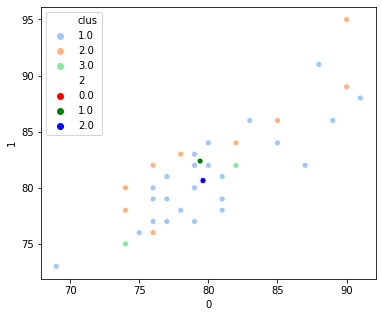

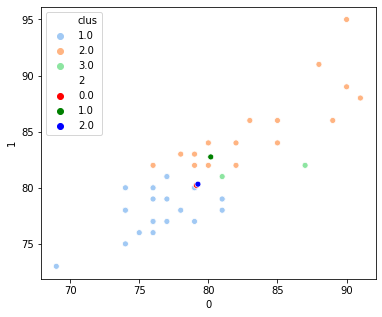

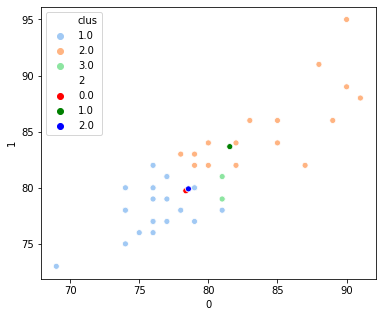

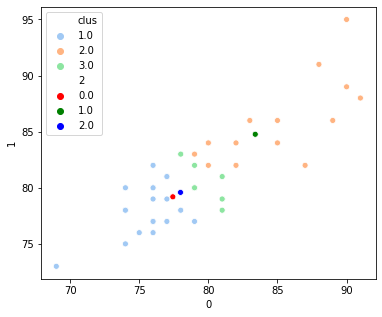

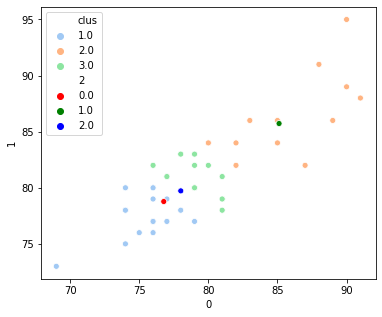

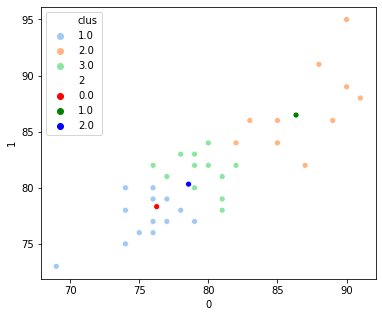

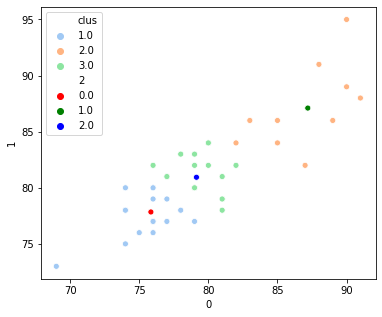

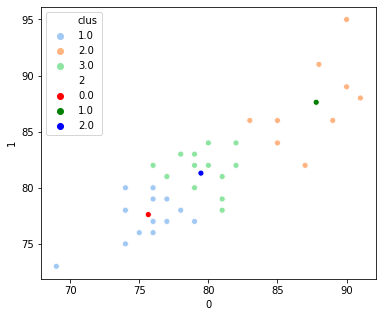

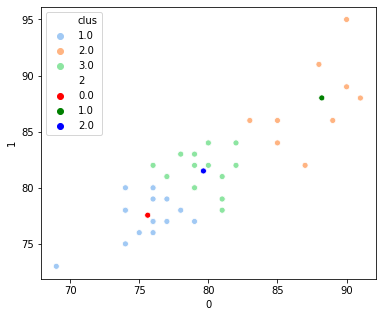

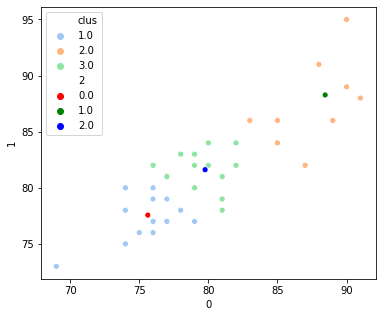

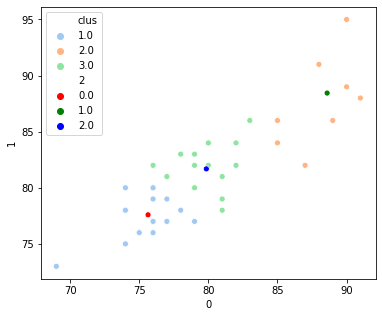

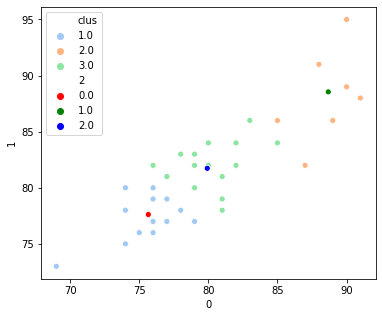

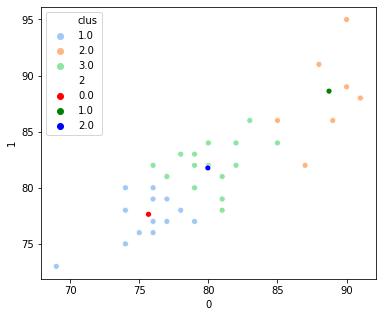

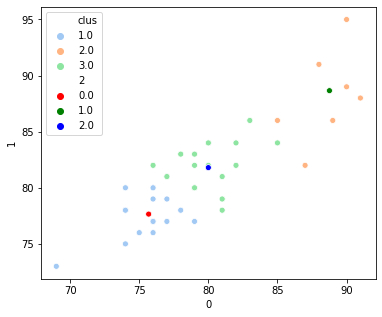

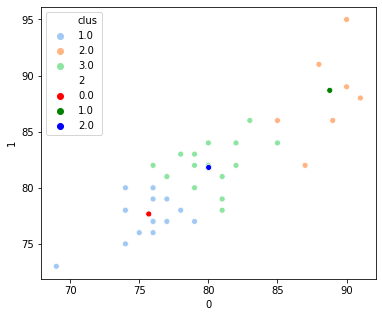

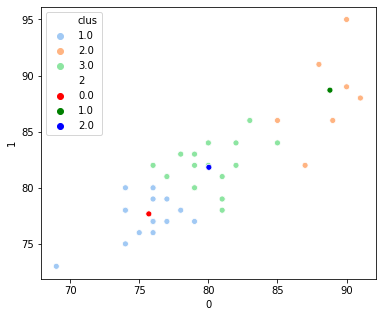

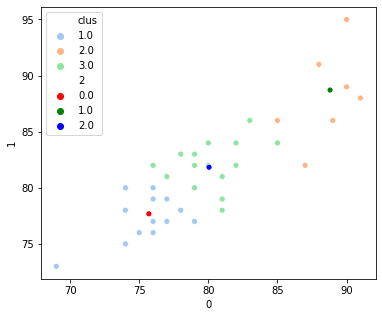

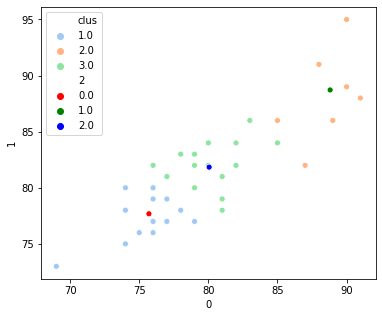

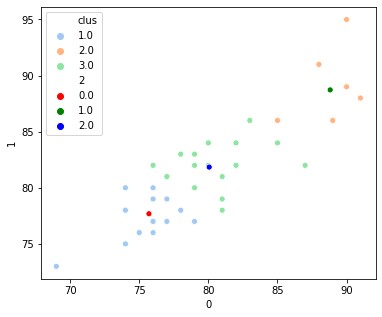

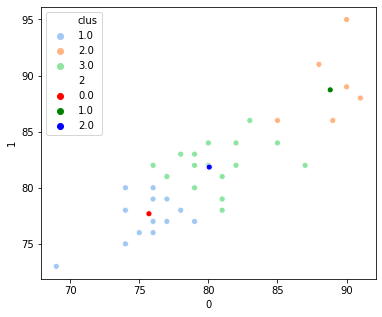

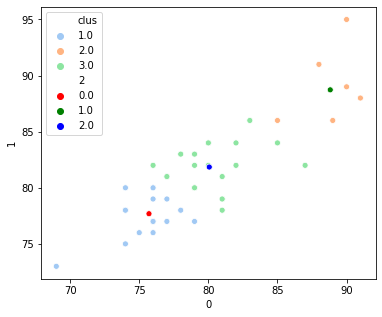

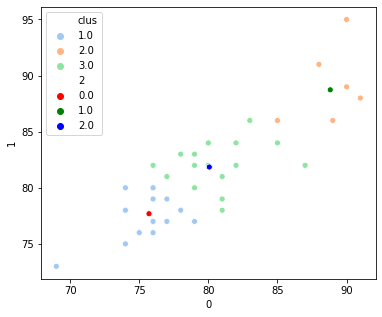

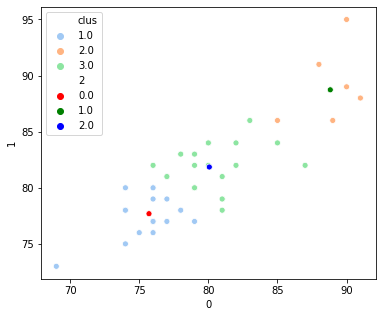

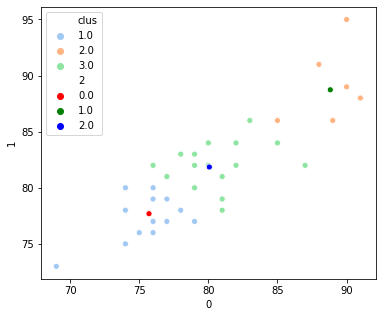

In [3]:
objektif_before=0
e_all=[]
for i in range (40):
    #2 Cluster center
    X1C1=sum(df['UN Mat']*C1**2)/sum(C1**2)
    X2C1=sum(df['UN IPA']*C1**2)/sum(C1**2)

    X1C2=sum(df['UN Mat']*C2**2)/sum(C2**2)
    X2C2=sum(df['UN IPA']*C2**2)/sum(C2**2)

    X1C3=sum(df['UN Mat']*C3**2)/sum(C3**2)
    X2C3=sum(df['UN IPA']*C3**2)/sum(C3**2)
    x1=zeros((3,3))
    x1[0,0]=X1C1
    x1[1,0]=X1C2
    x1[2,0]=X1C3
    x1[0,1]=X2C1
    x1[1,1]=X2C2
    x1[2,1]=X2C3
    x1[0,2]=0
    x1[1,2]=1
    x1[2,2]=2
    datax=pd.DataFrame(x1)
    
    fig, g = plt.subplots(figsize=(6,5))
    g =sns.scatterplot(x="UN Mat", y="UN IPA", hue="clus",data=df, palette=("pastel"), legend='full')
    g =sns.scatterplot(x=0, y=1, hue=2,data=datax, palette=['r','g','b'], legend='full')
    #3 Fungsi objektif
    J1=((df['UN Mat']-X1C1)**2 + (df['UN IPA']-X2C1)**2)*C1**2
    J2=((df['UN Mat']-X1C2)**2 + (df['UN IPA']-X2C2)**2)*C2**2
    J3=((df['UN Mat']-X1C3)**2 + (df['UN IPA']-X2C3)**2)*C3**2
    objektif=sum(J1+J2+J3)
    e=abs(objektif-objektif_before)
    e_all.append(e)
    if e<1e-4:
        break
    objektif_before=objektif

    #4 Matriks partisi U
    L1=1/((df['UN Mat']-X1C1)**2 + (df['UN IPA']-X2C1)**2)
    L2=1/((df['UN Mat']-X1C2)**2 + (df['UN IPA']-X2C2)**2)
    L3=1/((df['UN Mat']-X1C3)**2 + (df['UN IPA']-X2C3)**2)
    C1=L1/(L1+L2+L3)
    C2=L2/(L1+L2+L3)
    C3=L3/(L1+L2+L3)
    clus=zeros((f))
    for i in range (f):
        if C1[i]>C2[i] and C1[i]>C3[i]:
            clus[i]=1
        elif C2[i]>C1[i] and C2[i]>C3[i]:
            clus[i]=2
        else:
            clus[i]=3
    df['clus']=clus

  #  fig, g = plt.subplots(figsize=(6,5))
   # g =sns.scatterplot(x="UN Mat", y="UN IPA", hue="clus",data=df, palette=("pastel"), legend='full')
    #g =sns.scatterplot(x=0, y=1, hue=2,data=datax, palette=['r','g','b'], legend='full')
    #h =sns.scatterplot(x)
    #g.set(xscale="log") 

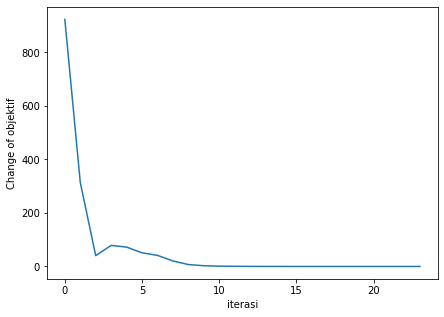

In [8]:
plt.figure(figsize=(7,5))
d={'iterasi':list(range(len(e_all))),'Change of objektif':e_all}
data=pd.DataFrame(d)
sns.lineplot(data=data, x="iterasi", y="Change of objektif")
change_of_objectif=e_all